# Proj A for CS 135 in Spring 2024

This notebook is specifically for the report related to Problem 1

# Problem 1: Binary Classifier for Bag of Words Classifier

Export the data for loading model later

In [97]:
#imports
import numpy as np
import pandas as pd

In [98]:
x_train_df = pd.read_csv('./data_reviews/x_train.csv')
tr_text_list = x_train_df.values.tolist()

y_train_df = pd.read_csv('./data_reviews/y_train.csv')
tr_label_list = y_train_df.values.tolist()

## Stopwords
Here, we will work to remove stop words as they do not provide us much information.

In [99]:
# def remove_stopwords(text):
#     """
#     Function to remove stopwords from a given text using a custom list of stopwords.
#     """
#     #define stop words
#     stop_words = ['call', 'upon', 'still', 'nevertheless', 'down', 'every', 'forty', '‘re', 'always', 'whole', 'side', "n't", 'now', 'however', 'an', 'show', 'least', 'give', 'below', 'did', 'sometimes', 'which', "'s", 'nowhere', 'per', 'hereupon', 'yours', 'she', 'moreover', 'eight', 'somewhere', 'within', 'whereby', 'few', 'has', 'so', 'have', 'for', 'noone', 'top', 'were', 'those', 'thence', 'eleven', 'after', 'no', '’ll', 'others', 'ourselves', 'themselves', 'though', 'that', 'nor', 'just', '’s', 'before', 'had', 'toward', 'another', 'should', 'herself', 'and', 'these', 'such', 'elsewhere', 'further', 'next', 'indeed', 'bottom', 'anyone', 'his', 'each', 'then', 'both', 'became', 'third', 'whom', '‘ve', 'mine', 'take', 'many', 'anywhere', 'to', 'well', 'thereafter', 'besides', 'almost', 'front', 'fifteen', 'towards', 'none', 'be', 'herein', 'two', 'using', 'whatever', 'please', 'perhaps', 'full', 'ca', 'we', 'latterly', 'here', 'therefore', 'us', 'how', 'was', 'made', 'the', 'or', 'may', '’re', 'namely', "'ve", 'anyway', 'amongst', 'used', 'ever', 'of', 'there', 'than', 'why', 'really', 'whither', 'in', 'only', 'wherein', 'last', 'under', 'own', 'therein', 'go', 'seems', '‘m', 'wherever', 'either', 'someone', 'up', 'doing', 'on', 'rather', 'ours', 'again', 'same', 'over', '‘s', 'latter', 'during', 'done', "'re", 'put', "'m", 'much', 'neither', 'among', 'seemed', 'into', 'once', 'my', 'otherwise', 'part', 'everywhere', 'never', 'myself', 'must', 'will', 'am', 'can', 'else', 'although', 'as', 'beyond', 'are', 'too', 'becomes', 'does', 'a', 'everyone', 'but', 'some', 'regarding', '‘ll', 'against', 'throughout', 'yourselves', 'him', "'d", 'it', 'himself', 'whether', 'move', '’m', 'hereafter', 're', 'while', 'whoever', 'your', 'first', 'amount', 'twelve', 'serious', 'other', 'any', 'off', 'seeming', 'four', 'itself', 'nothing', 'beforehand', 'make', 'out', 'very', 'already', 'various', 'until', 'hers', 'they', 'not', 'them', 'where', 'would', 'since', 'everything', 'at', 'together', 'yet', 'more', 'six', 'back', 'with', 'thereupon', 'becoming', 'around', 'due', 'keep', 'somehow', 'n‘t', 'across', 'all', 'when', 'i', 'empty', 'nine', 'five', 'get', 'see', 'been', 'name', 'between', 'hence', 'ten', 'several', 'from', 'whereupon', 'through', 'hereby', "'ll", 'alone', 'something', 'formerly', 'without', 'above', 'onto', 'except', 'enough', 'become', 'behind', '’d', 'its', 'most', 'n’t', 'might', 'whereas', 'anything', 'if', 'her', 'via', 'fifty', 'is', 'thereby', 'twenty', 'often', 'whereafter', 'their', 'also', 'anyhow', 'cannot', 'our', 'could', 'because', 'who', 'beside', 'by', 'whence', 'being', 'meanwhile', 'this', 'afterwards', 'whenever', 'mostly', 'what', 'one', 'nobody', 'seem', 'less', 'do', '‘d', 'say', 'thus', 'unless', 'along', 'yourself', 'former', 'thru', 'he', 'hundred', 'three', 'sixty', 'me', 'sometime', 'whose', 'you', 'quite', '’ve', 'about', 'even']
#     # Tokenize the text
#     words = text.split()
#     # Filter out stopwords
#     filtered_words = [word for word in words if word.lower() not in stop_words]
#     # Join filtered words back into a single string
#     filtered_text = ' '.join(filtered_words)
#     return filtered_text

In [100]:
import pickle


exp_arr = x_train_df.values.tolist()


# Use pickle to serialize and save 'x_train_df' to a file
with open('data_variable.pickle', 'wb') as f:
    pickle.dump(exp_arr, f)


In [101]:
import string

#define function that will remove punctuation in dataframe
def remove_punctuations(text):
    for punctuation in string.punctuation:

        #replace any punctuation with the empty string
        text = text.replace(punctuation, '')
    return text

In [102]:
# make sure all words are lowercase
x_train_df['text'] = x_train_df['text'].apply(lambda x: x.lower())

# remove punctuation
x_train_df['text'] = x_train_df['text'].apply(remove_punctuations)

# # remove stopwords
# x_train_df['text'] = x_train_df['text'].apply(remove_stopwords)
# print(type(x_train_df['text']))

In [103]:
# Sending the y_train_df to a pickle file

y_train_1d_tmp = np.ravel(y_train_df)

with open(('y_train_1d.pickle'), 'wb') as f:
    pickle.dump(y_train_1d_tmp, f)


In [104]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [105]:
nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))  # Assuming NLTK's stopwords are used

vectorizer = CountVectorizer(stop_words='english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephmontalto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:


#create a sparse matrix, where rows are our sentences and columns are words
freq_matrix = vectorizer.fit_transform(x_train_df['text'])

#get list of words alphabetically in our data
word_features = vectorizer.get_feature_names_out()

print(freq_matrix.shape)

# Print the entire list of words and frequncies:
# np.set_printoptions(threshold=np.inf)
# print(word_features)

(2400, 4424)


In [107]:
# Use pickle to serialize and save our model to a file
with open('vectorizer.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)


In [108]:
print(x_train_df['text'])

0       oh and i forgot to also mention the weird colo...
1                              that one didnt work either
2                                       waste of 13 bucks
3       product is useless since it does not have enou...
4       none of the three sizes they sent with the hea...
                              ...                        
2395    the sweet potato fries were very nice and seas...
2396    i could eat their bruschetta all day it is devine
2397                                  ambience is perfect
2398    we ordered the duck rare and it was pink and t...
2399          service was nice and the company was better
Name: text, Length: 2400, dtype: object


# Split into train and test

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
from proba_metrics import calc_mean_binary_cross_entropy_from_probas
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [110]:
#import plotting libraries
import matplotlib.pyplot as plt

In [111]:
#make frequency matrix array-like
X = freq_matrix.toarray()


# split into training and temporary set (combined validation and test)
X_train, X_temp, y_train, y_temp = sklearn.model_selection.train_test_split(X, y_train_df, test_size=0.4, random_state=42)


# Now split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Finding our ideal C
In this step, we wanted to find the right C value to use in our logistic regression model. To do this, we used some of our code from HW2, which defines a grid of C values and tests BCE on all of these values. We extract the minimum valid error, and using that value as well as some additional context, determine our ideal C.


In [112]:
C_grid = np.logspace(-9, 6, 31)


#use np.ravel to convert arrays to 1d
y_train_1d = np.ravel(y_train)
y_val_1d = np.ravel(y_val)

crossv_scores = list()

# Allocate list for storing LR models
model_list = list()

# Allocate lists for storing BCE metrics
tr_bce_list = list()
va_bce_list = list()
te_bce_list = list()

# Allocate lists for storing ERROR RATE metrics
tr_err_list = list()
va_err_list = list()
te_err_list = list()

num_iterations = 1000000

for C in C_grid:
    lr_curr_model = LogisticRegression(solver='lbfgs', C=C, max_iter=num_iterations)
    lr_curr_model.fit(X_train, y_train_1d)

    # append model to list
    model_list.append(lr_curr_model)

    yproba1_tr_M = lr_curr_model.predict_proba(X_train)[:,1] # The probability of predicting class 1 on the training set
    yproba1_va_N = lr_curr_model.predict_proba(X_val)[:,1] # The probability of predicting class 1 on the validation set

    # Compute error rate aka zero-one loss
    my_tr_err = sklearn.metrics.zero_one_loss(y_train_1d, yproba1_tr_M >= 0.5)
    my_va_err = sklearn.metrics.zero_one_loss(y_val_1d, yproba1_va_N >= 0.5)
    tr_err_list.append(my_tr_err)
    va_err_list.append(my_va_err)

    # Compute binary cross-entropy
    my_tr_bce = calc_mean_binary_cross_entropy_from_probas(y_train_1d, yproba1_tr_M)
    my_va_bce = calc_mean_binary_cross_entropy_from_probas(y_val_1d, yproba1_va_N)

    # Cross validation score
    scores = cross_val_score(lr_curr_model, X_train, y_train_1d, cv=3, scoring='accuracy')


    # Save bce for future selection on Models.
    tr_bce_list.append(my_tr_bce) 
    va_bce_list.append(my_va_bce) 

    crossv_scores.append(scores.mean())


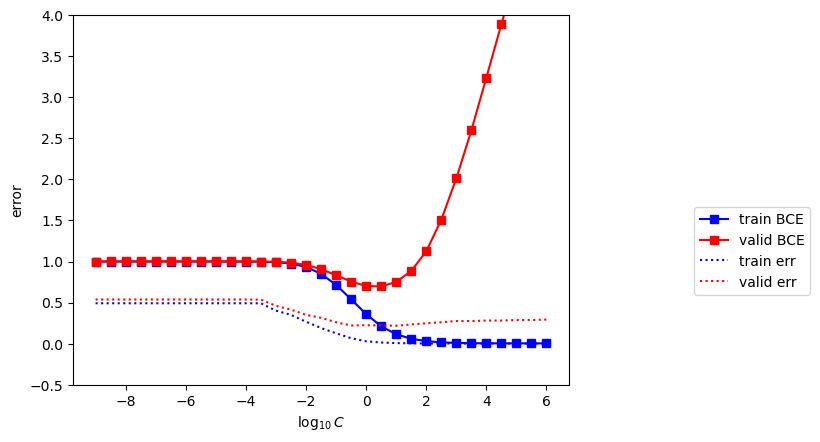

In [113]:
# Plot the error rate and BCE for the training and validation sets

plt.plot(np.log10(C_grid), tr_bce_list, 'bs-', label='train BCE')
plt.plot(np.log10(C_grid), va_bce_list, 'rs-', label='valid BCE')

plt.plot(np.log10(C_grid), tr_err_list, 'b:', label='train err')
plt.plot(np.log10(C_grid), va_err_list, 'r:', label='valid err')

plt.ylabel('error')
plt.xlabel("$\log_{10} C$");
plt.legend(bbox_to_anchor=(1.5, 0.5)) # make legend outside plot
plt.ylim([-0.5, 4]);


Finding the best model

In [114]:
min_bce_index = np.argmin(va_bce_list)
max_crossv_index = np.argmax(crossv_scores)
best_C_bce = C_grid[min_bce_index]
best_C_crossv = C_grid[max_crossv_index]

print(f"Best C value for BCE: {best_C_bce}")
print(f"Best C values for Cross Validation: {best_C_crossv}")



Best C value for BCE: 3.1622776601683795
Best C values for Cross Validation: 3.1622776601683795


# Running Logistic regression - No penalty
With our ideal C picked out, we felt comfortable proceeding and building our logistic regression model.

In [115]:
#create logistic regression object
regr = LogisticRegression(max_iter=num_iterations, random_state=42, solver='lbfgs', penalty = None)

#fit regression on training data
regr.fit(X_train, y_train_1d)

#get predictions
y_pred = regr.predict(X_test)

In [116]:
print(regr)


LogisticRegression(max_iter=1000000, penalty=None, random_state=42)


Importing sklearn documentation for confusion matrix.


In [117]:
#import confusion matrix function
from sklearn.metrics import confusion_matrix

#get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[198,  48],
       [ 57, 177]])

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [119]:
# Perform 3-fold cross-validation
scores = cross_val_score(regr, X_train, y_train_1d, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores.round(2))
print("Mean cross-validation score:", scores.mean().round(2))

Cross-validation scores: [0.73 0.72 0.76]
Mean cross-validation score: 0.74


# Running Logistic regression - L1 penalty
We now try the same process, applying an L1 penalty.

In [120]:
# #create logistic regression object
# regr = LogisticRegression(max_iter=num_iterations, random_state=42, C=best_C_crossv, penalty='l1', solver = 'saga')

# #fit regression on training data
# print(X.shape[1])
# regr.fit(X, y_train_1d)

# #get predictions
# y_pred = regr.predict(X_test)

In [121]:
#import confusion matrix function
from sklearn.metrics import confusion_matrix

#get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[198,  48],
       [ 57, 177]])

In [122]:
# Perform 3-fold cross-validation
scores = cross_val_score(regr, X_train, y_train_1d, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores.round(2))
print("Mean cross-validation score:", scores.mean().round(2))

Cross-validation scores: [0.73 0.72 0.76]
Mean cross-validation score: 0.74


# Running Logistic regression - L2 penalty
We now try the same process, applying an L2 penalty.

In [123]:
#create logistic regression object
regr = LogisticRegression(max_iter=50, random_state=42, C=1.0, solver='saga', penalty='l2')
print(X.shape)

#fit regression on training data
regr.fit(freq_matrix, y_train_1d_tmp)

# print(X.shape)

#get predictions
y_pred = regr.predict(X_test)

(2400, 4424)


/Users/josephmontalto/miniconda3/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [124]:
#import confusion matrix function
from sklearn.metrics import confusion_matrix

#get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[236,  10],
       [  2, 232]])

In [125]:
# Perform 3-fold cross-validation
scores = cross_val_score(regr, freq_matrix, y_train_1d_tmp, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores.round(2))
print("Mean cross-validation score:", scores.mean().round(2))

Cross-validation scores: [0.76 0.7  0.72]
Mean cross-validation score: 0.72


/Users/josephmontalto/miniconda3/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/josephmontalto/miniconda3/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/josephmontalto/miniconda3/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Through our testing, we decided the best set of hyperparameters was to use an L2 penalty with a C = 0.1.

In [126]:
# classifier1 = LogisticRegression(max_iter= num_iterations, random_state=42, C=best_C_crossv, solver='lbfgs')
# classifier1.fit(X_train, y_train_1d)

# Use pickle to serialize and save our model to a file
with open('best_model.pickle', 'wb') as f:
    pickle.dump(regr, f)

